<a href="https://colab.research.google.com/github/gabriels3t/Python-Scikit-Learn-regressao-classificacao-e-clustering/blob/main/regressao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importando dos dados

In [2]:
import pandas as pd 
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn import linear_model
import numpy as np
from sklearn.metrics import r2_score
from sklearn.svm import  SVR

In [3]:

passageiros = pd.read_csv('data/Passageiros.csv')
passageiros.head()


,tempo,nPassageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


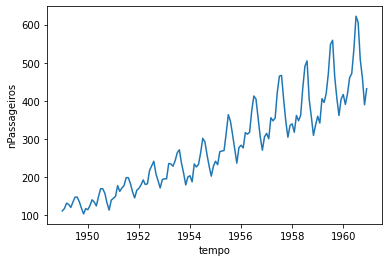

In [4]:
ax = sns.lineplot(x='tempo', y='nPassageiros', data=passageiros)

# Fazendo a regreção linear 


In [5]:
tempo = passageiros.iloc[:,:-1].values
nPassageiros = passageiros.iloc[:,1].values

**Separandos os dados de treino e os de teste**


In [6]:
tempo_treino,tempo_teste,nPassageiros_treino,nPassageiros_teste= train_test_split(tempo,nPassageiros,test_size = 0.3 ) # test_size porcentagem para testar 0 sendo 0 e 1 sendo 100%

**Regressão linear**


In [7]:
regressor = linear_model.LinearRegression()

In [8]:
regressor.fit(tempo_treino,nPassageiros_treino) #treinando

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
nPassageiros_predito = regressor.predict(tempo_teste)

In [10]:
passageiros_predito = pd.DataFrame({'tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':nPassageiros_predito })


In [11]:
passageiros_teste = pd.DataFrame({'tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':nPassageiros_teste })


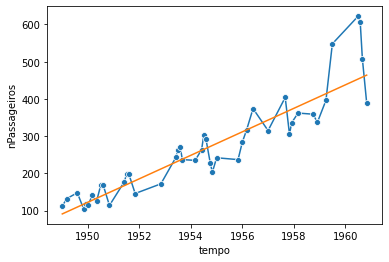

In [12]:
ax = sns.lineplot(x='tempo',y='nPassageiros',data=passageiros_teste,marker='o')
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito)

**Medindo a qualidade da regressão**

In [13]:
regressor.coef_ # Pegando o coeficiente angular

array([31.49137557])

In [14]:
regressor.intercept_ #pegando o coeficiente linear

-61285.47531670105

In [15]:
r2_score(nPassageiros_teste,nPassageiros_teste) 

1.0

# Máquinas de vetores de suporte (SVR)

In [16]:
regressor_svr= SVR(C=1) # C é o ruido quanto maior o valor menos ruido


In [17]:
regressor_svr.fit(tempo_treino,nPassageiros_treino) # ajuste

SVR(C=1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

**Fazendo a predição**

In [18]:
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)

In [19]:
passageiros_predito_svr = pd.DataFrame({'tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':nPassageiros_predito_svr })

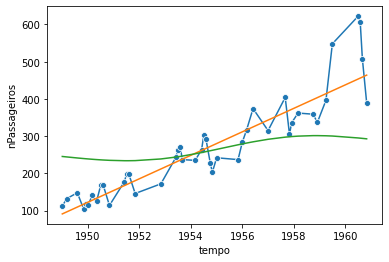

In [20]:
ax = sns.lineplot(x='tempo',y='nPassageiros',data=passageiros_teste,marker='o')
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito)
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito_svr)

In [21]:
regressor_svr = SVR(C=100)
regressor_svr.fit(tempo_treino, nPassageiros_treino)
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)
passageiros_predito_svr = pd.DataFrame({'tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':nPassageiros_predito_svr })

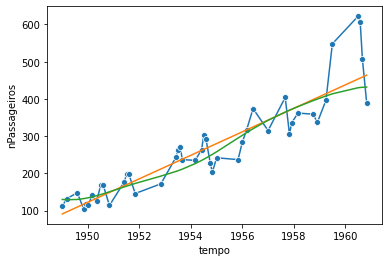

In [22]:
ax = sns.lineplot(x='tempo',y='nPassageiros',data=passageiros_teste,marker='o')
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito)
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito_svr)

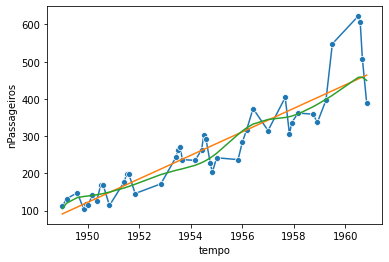

In [57]:
regressor_svr = SVR(C=100000000)
regressor_svr.fit(tempo_treino, nPassageiros_treino)
nPassageiros_predito_svr = regressor_svr.predict(tempo_teste)
passageiros_predito_svr = pd.DataFrame({'tempo':np.ndarray.flatten(tempo_teste),'nPassageiros':nPassageiros_predito_svr })
ax = sns.lineplot(x='tempo',y='nPassageiros',data=passageiros_teste,marker='o')
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito)
ax =sns.lineplot(x='tempo', y='nPassageiros', data = passageiros_predito_svr)

In [58]:
r2_score(nPassageiros_teste,nPassageiros_predito_svr  ) # esse tem que ficar maior do que o da reta 

0.8361598149460803

In [48]:
r2_score(nPassageiros_teste,nPassageiros_predito )

0.8337952483546938